In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Let's get back to Unsupervised Learning

In [37]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [40]:
X_breast = dataset.data
y_breast = dataset.target

In [41]:
X_breast_train, X_breast_test, y_breast_train, y_breast_test = train_test_split(X_breast, y_breast)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaler.fit(X_breast_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
X_breast_train = scaler.transform(X_breast_train)
X_breast_test = scaler.transform(X_breast_test)

In [45]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA


distortion = []

for k in range(1, 12):
    kmeans = KMeans(k)
    kmeans.fit(X_breast_train)
    distortion.append(kmeans.inertia_)
    
    

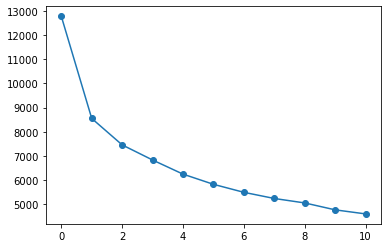

In [46]:
plt.plot(distortion, '-o')

In [47]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_breast_train)

pca = PCA(n_components=2)
pca.fit(X_breast_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pd.DataFrame(zip(pca.components_[0], pca.components_[1], dataset.feature_names), columns=['pc1','pc2','variable']).sort_values(by='pc1')

,pc1,pc2,variable
14,0.021409,0.200616,smoothness error
11,0.026566,0.088476,texture error
18,0.043818,0.170999,symmetry error
9,0.067120,0.365972,mean fractal dimension
19,0.111210,0.281341,fractal dimension error
1,0.112140,-0.049746,mean texture
21,0.113508,-0.036934,worst texture
28,0.131014,0.125810,worst symmetry
24,0.131467,0.170578,worst smoothness
4,0.138445,0.192851,mean smoothness


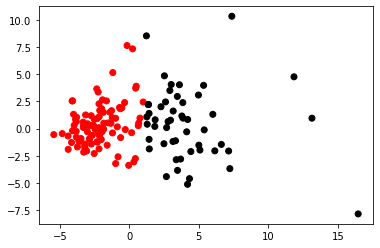

In [49]:
plt.scatter(pca.transform(X_breast_test)[:, 0], 
            pca.transform(X_breast_test)[:, 1], 
            c=kmeans.predict(X_breast_test), cmap='flag')

No handles with labels found to put in legend.


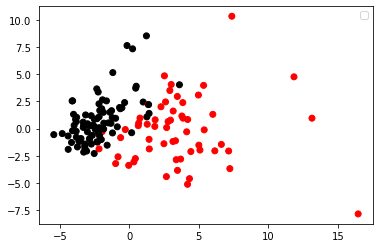

In [51]:
plt.scatter(pca.transform(X_breast_test)[:, 0], 
            pca.transform(X_breast_test)[:, 1], 
            c=y_breast_test, cmap='flag')

In [52]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y_breast_test, kmeans.predict(X_breast_test))

0.5768336750928962

In [74]:
(y_breast_test == kmeans.predict(X_breast_test)).mean()

0.11888111888111888

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_roc_curve

In [24]:
tree_breast = DecisionTreeClassifier(max_depth=2)
tree_breast.fit(X_breast_train, kmeans.predict(X_breast_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
pca.explained_variance_ratio_.cumsum()

array([0.44692335, 0.6254008 ])

In [31]:
kmeans.predict(X_breast_train).sum()

150

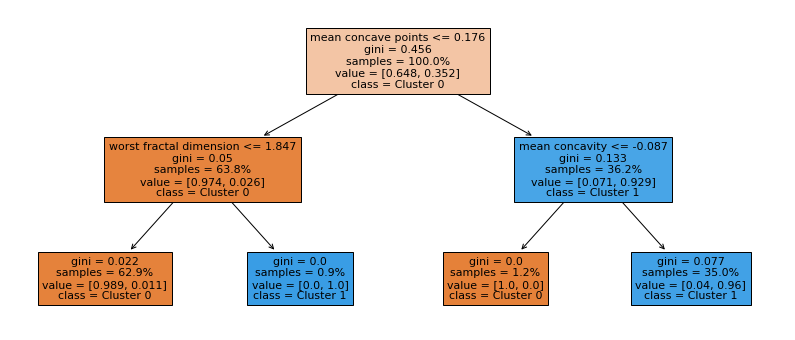

In [34]:
plt.figure(figsize=(14,6))
plot_tree(tree_breast, feature_names=dataset.feature_names, 
          filled=True, class_names=['Cluster 0','Cluster 1'], proportion=True);

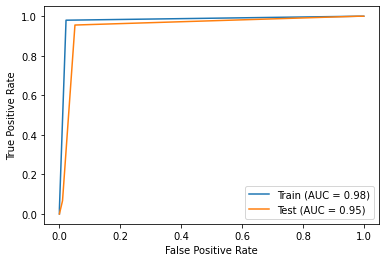

In [35]:
fig, ax = plt.subplots()
plot_roc_curve(tree_breast, X_breast_train, kmeans.predict(X_breast_train), ax=ax, name='Train')
plot_roc_curve(tree_breast, X_breast_test, kmeans.predict(X_breast_test), ax=ax, name='Test')

# Support Vector Machines - SVM

## SVC - support vector classifier

### Linearly Separable Data

![svm_margin.png](svm_margin.png)

### Main objective is to maximize the margin

![svm_margin2.png](svm_margin2.png)

### NonLinearly Separable Data

In [91]:
cows = pd.read_csv('cows_wolves.csv', sep=';')

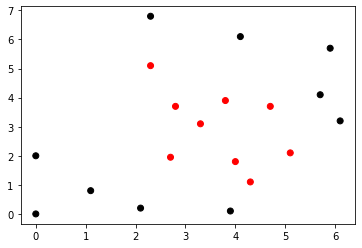

In [100]:
plt.scatter(cows.x, cows.y, c=cows.animal_type, cmap='flag')

In [93]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


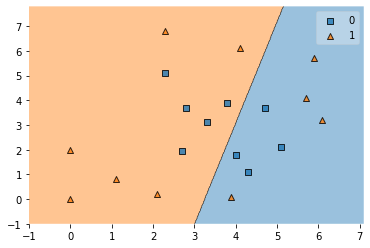

In [94]:
X1 = cows[['x','y']]
Y1 = cows.animal_type

log = LogisticRegression()
log.fit(X1, Y1)

plot_decision_regions(np.array(X1), np.array(Y1), log)


#### Kernel Trick

![svm1.png](svm1.png)

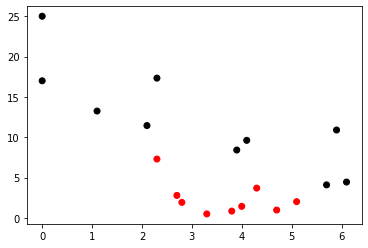

In [99]:
Z = (np.array(X1)[:, 0] - 4) ** 2 + (np.array(X1)[:, 1] - 3) ** 2

plt.scatter(np.array(X1)[:, 0], Z, c=Y1, cmap='flag' )

In [101]:
feature_1 = np.array(X1)[:, 0]
feature_2 = Z

In [102]:
X1_new = pd.DataFrame(zip(feature_1, feature_2))

In [103]:
X1_new

,0,1
0,0.0,25.0000
1,2.1,11.4500
2,3.9,8.4200
3,1.1,13.2500
4,4.3,3.7000
5,0.0,17.0000
6,2.7,2.7925
7,4.0,1.4400
8,5.1,2.0200
9,3.3,0.5000


c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


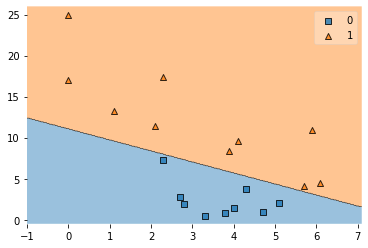

In [104]:
log = LogisticRegression()
log.fit(X1_new, Y1)

plot_decision_regions(np.array(X1_new), np.array(Y1), log)

![svm3d.png](svm3d.png)

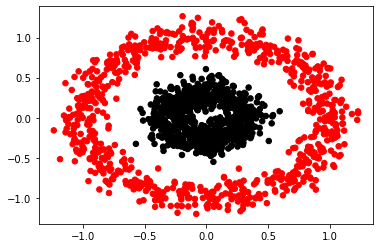

In [105]:
from sklearn.datasets import make_circles

X1, Y1 = make_circles(factor=0.3, noise=0.1, n_samples=1500)

plt.scatter(X1[:, 0], X1[:, 1], s=30, c=Y1, cmap='flag');

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


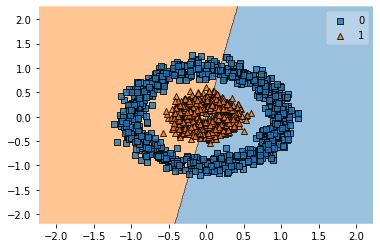

In [106]:
log = LogisticRegression()
log.fit(X1, Y1)

plot_decision_regions(X1, Y1, log)

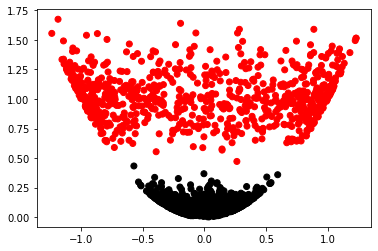

In [107]:
plt.scatter(X1[:, 0], X1[:, 0] ** 2 + X1[:, 1] ** 2, c=Y1, cmap='flag' )

In [108]:
X1.shape

(1500, 2)

In [109]:
feature_1 = X1[:, 0]
feature_2 = X1[:, 0] ** 2 + X1[:, 1] ** 2

In [110]:
X1_new = pd.DataFrame(zip(feature_1, feature_2))

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


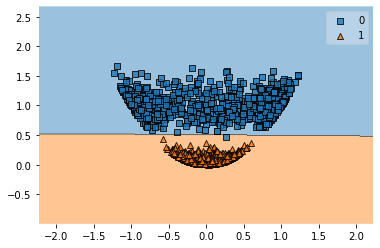

In [111]:
log = LogisticRegression()
log.fit(X1_new, Y1)

plot_decision_regions(np.array(X1_new), Y1, log)

In [112]:
from sklearn.svm import SVC

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


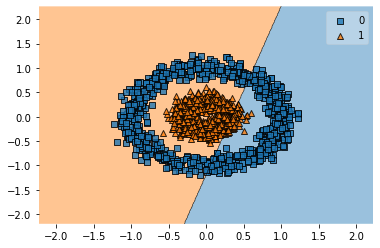

In [113]:
svm = SVC(kernel='linear')
svm.fit(X1, Y1)

plot_decision_regions(X1, Y1, svm)


c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


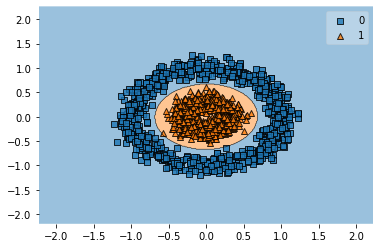

In [120]:
svm = SVC(kernel='poly', degree=2 )
svm.fit(X1, Y1)

plot_decision_regions(X1, Y1, svm)


c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


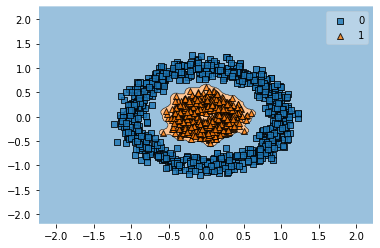

In [126]:
svm = SVC(kernel='rbf', gamma=200)
svm.fit(X1, Y1)

plot_decision_regions(X1, Y1, svm)

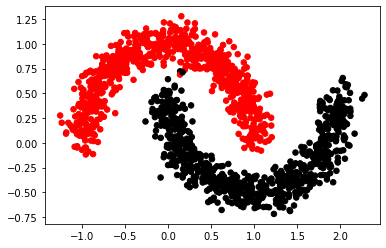

In [127]:
from sklearn.datasets import make_circles, make_moons

X1, Y1 = make_moons(noise=0.1, n_samples=1500)

plt.scatter(X1[:, 0], X1[:, 1], s=30, c=Y1, cmap='flag');

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


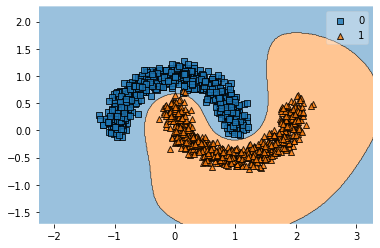

In [160]:
svm = SVC(kernel='rbf', gamma=2, probability=True, max_iter=3000)
svm.fit(X1, Y1)

plot_decision_regions(X1, Y1, svm)

### Learning From Data - Yaser Abu-Mostafa

http://work.caltech.edu/lectures.html#lectures

# ENSEMBLE METHODS

## <u>BAGG</u>ING - <u>B</u>ootstrap <u>AGG</u>regating Methods

Bootstrap $\to$ Random sampling with replacement

Select random samples to train one learner. Then put the samples back and get another sample to train another learner. Do that several times and your final result will be the average of all your results.

![bagging.png](bagging.png)

In [161]:
df = pd.read_csv('titanic_processed.csv')

In [163]:
X = df.drop('Survived', axis=1)
y = df.Survived

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
from sklearn.model_selection import cross_val_score, KFold

In [168]:
from sklearn.ensemble import BaggingClassifier

In [216]:
tree = DecisionTreeClassifier(max_depth=2)

results = cross_val_score(tree, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8227038859332136, 0.044267175991614324)

In [181]:
tree.fit(X_train, y_train)
pd.DataFrame(zip(tree.feature_importances_, X_train.columns), columns=['importance','variable']).sort_values(by='importance')

,importance,variable
2,0.000000,SibSp
3,0.000000,Parch
6,0.000000,Embarked_C
7,0.000000,Embarked_Q
8,0.000000,Embarked_S
4,0.035750,Fare
1,0.097545,Age
0,0.252759,Pclass
5,0.613946,Sex_male


In [184]:
bagging = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=3), 
            n_estimators=100,
            oob_score=True
)

results = cross_val_score(bagging, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8600897449607109, 0.04492738322327753)

## Random-Forests

But imagine you have a super important feature that will always drive your decision tree.

Random Forests apply the bagging strategy, however, they add a randomness by randomly selecting a **subset** of features to train your estimators. That is, each subtree will have its own set of features and will represent a different decision path. This will enable less important features (but also relevant ones) to take place and appear on your final prediction.

In [206]:
forest = RandomForestClassifier(max_depth=2, n_estimators=100, n_jobs=-1)

results = cross_val_score(forest, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8477871948388487, 0.05566919200415525)

In [261]:
tree.feature_importances_

array([0.29163218, 0.        , 0.        , 0.        , 0.        ,
       0.70836782, 0.        , 0.        , 0.        ])

In [260]:
forest.feature_importances_

array([0.24171802, 0.08253954, 0.01676953, 0.02422617, 0.14785481,
       0.43721271, 0.04402089, 0.0005132 , 0.00514514])

-----

In [185]:
from sklearn.model_selection import learning_curve

In [226]:
logistic = LogisticRegression(max_iter=2000)

results = cross_val_score(logistic, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8574230832438833, 0.038195135929690587)

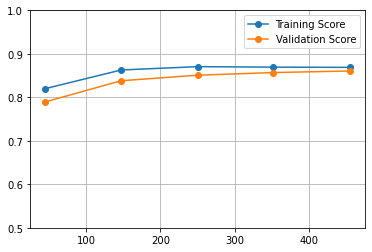

In [223]:
curves = learning_curve(LogisticRegression(max_iter=2000), X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o', label='Validation Score');
plt.ylim([0.5, 1])
plt.legend()
plt.grid()

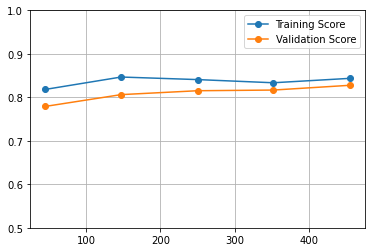

In [217]:
curves = learning_curve(tree, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o', label='Validation Score');
plt.ylim([0.5, 1])
plt.legend()
plt.grid()

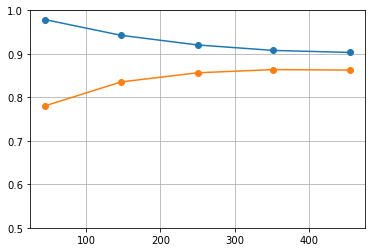

In [202]:
curves = learning_curve(bagging, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

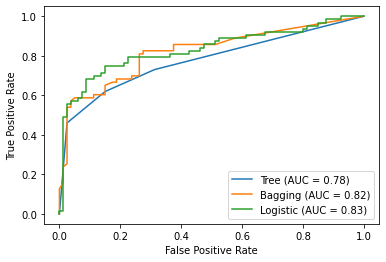

In [224]:
logistic = LogisticRegression(max_iter=2000).fit(X_train, y_train)
tree.fit(X_train, y_train)
bagging.fit(X_train, y_train)

fig, ax = plt.subplots()

plot_roc_curve(tree, X_test, y_test, name='Tree', ax=ax)
plot_roc_curve(bagging, X_test, y_test, name='Bagging', ax=ax)
plot_roc_curve(logistic, X_test, y_test, name='Logistic', ax=ax)

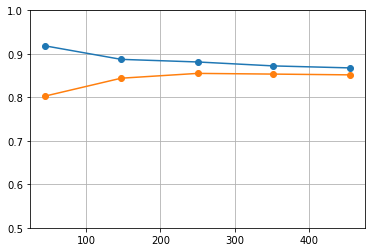

In [201]:
curves = learning_curve(forest, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

tree.fit(X_train, y_train)
plot_roc_curve(tree, X_test, y_test, name='Tree')

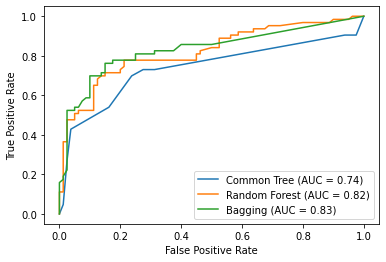

In [205]:
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)


fig, ax = plt.subplots()

plot_roc_curve(tree, X_test, y_test, name='Common Tree', ax=ax)
plot_roc_curve(forest, X_test, y_test, name='Random Forest', ax=ax)
plot_roc_curve(bagging, X_test, y_test, name='Bagging', ax=ax)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

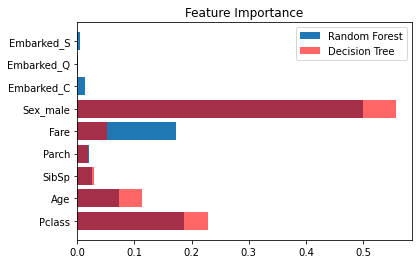

In [210]:
fig, ax = plt.subplots(1, 1, sharey=True)

ax.barh(range(len(forest.feature_importances_)), forest.feature_importances_, label='Random Forest')
ax.set_yticks(range(len(forest.feature_importances_)))
ax.set_yticklabels(X_train.columns)

ax.barh(range(len(tree.feature_importances_)), tree.feature_importances_, alpha=0.6, color='red', label='Decision Tree')
ax.set_title('Feature Importance')

plt.legend()

# Stacking

In [228]:
from mlxtend.classifier import StackingClassifier

![stacking.png](stacking.png)

In [250]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_std_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [251]:
stacking = StackingClassifier(classifiers=[tree, forest, knn, bagging, logistic], 
                              meta_classifier=LogisticRegression(), 
                              use_probas=True, 
                              average_probas=True)

In [252]:
stacking.fit(X_train, y_train)

StackingClassifier(average_probas=True,
                   classifiers=[DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=2,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                  

In [253]:
from sklearn.metrics import roc_curve, roc_auc_score

c:\programas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 45, n_neighbors = 50

  FitFailedWarning)
c:\programas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 45, n_neighbors = 50

  FitFailedWarning)
c:\programas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 45, n_neighbors = 50

  FitFailedWarning)
c:\programas\anaconda3\lib\site-packa

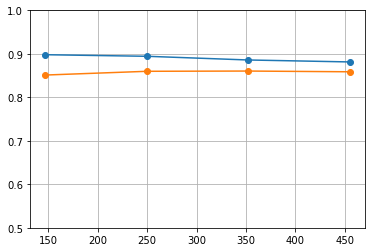

In [254]:
curves = learning_curve(stacking, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

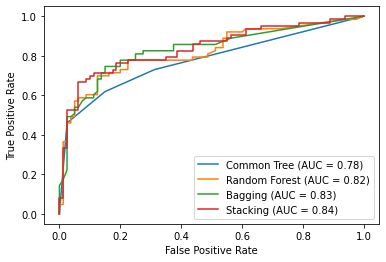

In [255]:
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)
stacking.fit(X_train, y_train)

fig, ax = plt.subplots()

plot_roc_curve(tree, X_test, y_test, name='Common Tree', ax=ax)
plot_roc_curve(forest, X_test, y_test, name='Random Forest', ax=ax)
plot_roc_curve(bagging, X_test, y_test, name='Bagging', ax=ax)
fpr, tpr, thrs = roc_curve(y_test, stacking.predict_proba(X_test)[:, 1])
ax.plot(fpr, tpr,label=f'Stacking (AUC = {roc_auc_score(y_test, stacking.predict_proba(X_test)[:, 1]):.2f})')
plt.legend()


## Boosting

Boosting deals with the problem of ensemble in a different manner. They will usually run an estimator and check which observations it got wrong. Then it will use those facts to train another estimator focusing on the errors of the previous estimator. 

In this sense, the model keeps getting better and better.

The idea of a boosting is generally to use a high number of **weak learners** (that is, small decision trees for example). You don't want to find the answer right away. You want to get increasingly better. In this way, you tend to give opportunity for all your features to learn patterns from your data. 

This has high potential to overfit of course, so the parameters of our models are important.

### AdaBoost

![adaboost2.png](adaboost2.png)

In [262]:
from sklearn.ensemble import AdaBoostClassifier

In [270]:
adaboost = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=50,
            learning_rate=.05)

results = cross_val_score(adaboost, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8463375537334266, 0.0769284200219108)

In [271]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [272]:
from sklearn.metrics import roc_auc_score

In [273]:
roc_auc_score(y_train, adaboost.predict_proba(X_train)[:, 1])

0.8549418604651162

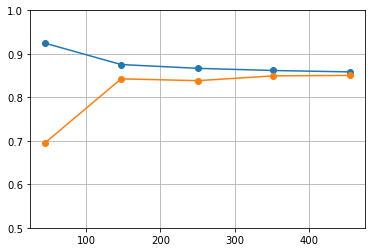

In [275]:
curves = learning_curve(adaboost, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

## XGBoost

In [423]:
# !pip install xgboost --user

You should consider upgrading via the 'c:\programas\anaconda3\python.exe -m pip install --upgrade pip' command.


In [277]:
from xgboost import XGBClassifier

In [292]:
xgb = XGBClassifier(max_depth=1, 
                    n_estimators=50, 
                    colsample_bytree=0.7, 
                    n_jobs=-1)

In [293]:
results = cross_val_score(xgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8506609446586075, 0.05368737888094091)

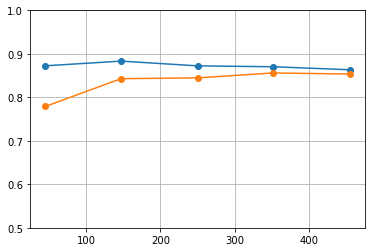

In [294]:
curves = learning_curve(xgb, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

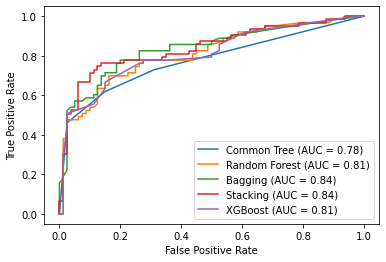

In [295]:
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)
stacking.fit(X_train, y_train)
xgb.fit(X_train, y_train)


fig, ax = plt.subplots()

plot_roc_curve(tree, X_test, y_test, name='Common Tree', ax=ax)
plot_roc_curve(forest, X_test, y_test, name='Random Forest', ax=ax)
plot_roc_curve(bagging, X_test, y_test, name='Bagging', ax=ax)
fpr, tpr, thrs = roc_curve(y_test, stacking.predict_proba(X_test)[:, 1])
ax.plot(fpr, tpr,label=f'Stacking (AUC = {roc_auc_score(y_test, stacking.predict_proba(X_test)[:, 1]):.2f})')
plot_roc_curve(xgb, X_test, y_test, name='XGBoost', ax=ax)

plt.legend()


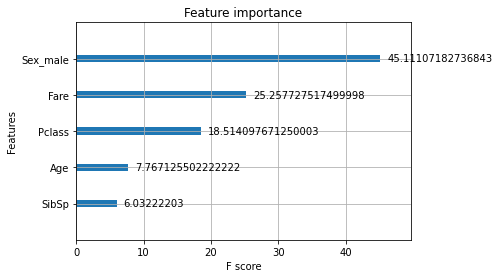

In [296]:
from xgboost import plot_importance

plot_importance(xgb, importance_type='gain')

In [457]:
# nightly installation xgboost

# pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/xgboost-[version]+[commithash]-py2.py3-none-manylinux1_x86_64.whl

## LightGBM

In [297]:
from lightgbm import LGBMClassifier

In [298]:
lgb = LGBMClassifier(max_depth=1, n_estimators=100, colsample_bytree=.7, n_jobs=-1)

In [299]:
results = cross_val_score(lgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8586182833172267, 0.060751218906864)

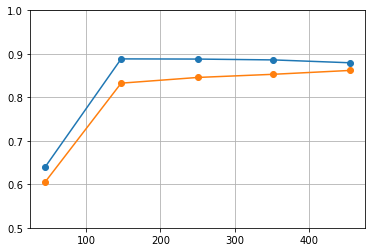

In [300]:
curves = learning_curve(lgb, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

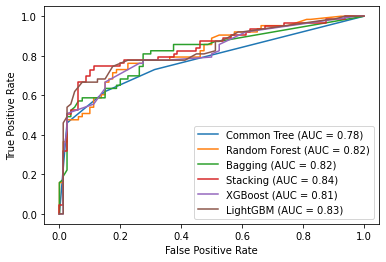

In [301]:
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)
stacking.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)


fig, ax = plt.subplots()

plot_roc_curve(tree, X_test, y_test, name='Common Tree', ax=ax)
plot_roc_curve(forest, X_test, y_test, name='Random Forest', ax=ax)
plot_roc_curve(bagging, X_test, y_test, name='Bagging', ax=ax)
fpr, tpr, thrs = roc_curve(y_test, stacking.predict_proba(X_test)[:, 1])
ax.plot(fpr, tpr,label=f'Stacking (AUC = {roc_auc_score(y_test, stacking.predict_proba(X_test)[:, 1]):.2f})')
plot_roc_curve(xgb, X_test, y_test, name='XGBoost', ax=ax)
plot_roc_curve(lgb, X_test, y_test, name='LightGBM', ax=ax)

plt.legend()


In [302]:
from lightgbm import plot_importance

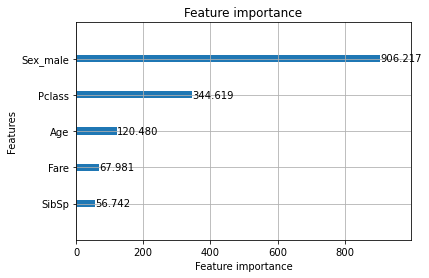

In [303]:
plot_importance(lgb, importance_type='gain')

In [305]:
lgb.predict_proba(X_test)[:, 1]

array([0.90657998, 0.86023056, 0.46574754, 0.87665837, 0.24135021,
       0.49210875, 0.57309585, 0.85238151, 0.3914994 , 0.55191247,
       0.10951153, 0.2079971 , 0.10951153, 0.24135021, 0.57309585,
       0.10951153, 0.74512095, 0.15370164, 0.90657998, 0.74512095,
       0.10951153, 0.74138754, 0.91003734, 0.23995682, 0.10951153,
       0.56215637, 0.12258984, 0.56215637, 0.10951153, 0.82664427,
       0.76112369, 0.10761814, 0.10951153, 0.10951153, 0.38968442,
       0.24135021, 0.16281752, 0.97949101, 0.85238151, 0.10951153,
       0.49210875, 0.16281752, 0.09962507, 0.06818492, 0.11819368,
       0.09962507, 0.10951153, 0.54706929, 0.30121852, 0.12258984,
       0.24135021, 0.10951153, 0.55191247, 0.10951153, 0.09962507,
       0.809939  , 0.46574754, 0.6102362 , 0.10951153, 0.29848401,
       0.53416941, 0.49210875, 0.09962507, 0.86566105, 0.11819368,
       0.10951153, 0.10951153, 0.16281752, 0.94005136, 0.10951153,
       0.85839189, 0.49210875, 0.14797729, 0.10951153, 0.46574